<p style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/World_Health_Organization_Logo.svg/375px-World_Health_Organization_Logo.svg.png"
         alt="WHO Logo"
         style="display: block; margin: auto; height: 50px;" />
</p>

# 🌍 World Health Organisation Project: Predicting Life Expectancy 📊


<p style="text-align: left;">
    <img src="https://th.bing.com/th/id/OIP.-lAhNnbsu_F7YmCUiStBdAHaDt?w=256&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7 https://th.bing.com/th/id/OIP.-lAhNnbsu_F7YmCUiStBdAHaDt?w=256&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7"
         alt="Kung Fu Panda"
         style="display: block; margin: auto; height: 50px;" />
</p>

```
Kung-Fu Pandas! 🐼🐼🐼
Jamie, Kat, Pedro, Moka
```





## Overview 🧐
We are working on two predictive models for life expectancy:
1. **Detailed & Accurate Model** 📈
2. **Ethical Model** 💡


---

## Process & Steps Taken 🛠️



### **Importing the Dataset & Preparation** ⬇️
Loading the data and getting it ready for analysis.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.tools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use the train-test-split functionality from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Use statsmodels for both the model & its evaluation
import statsmodels.api as sm # Where we'll get the model from
import statsmodels.tools     # Get the evaluation metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# Read the CSV file into a DataFrame for analysis

df = pd.read_csv('Life Expectancy Data.csv')

---

### 1. **Model Selection & Columns** 📋
We chose the most relevant columns for the **simple model**.

This uses the least amount of information necessary to make a prediction!

In [4]:
# Datatypes overview

df.dtypes

,0
Country,object
Region,object
Year,int64
Infant_deaths,float64
Under_five_deaths,float64
Adult_mortality,float64
Alcohol_consumption,float64
Hepatitis_B,int64
Measles,int64
BMI,float64


In [5]:
# Correlation matrix to identify potential relationships

df.corr(numeric_only=True)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


# Feature Selection
We initially selected the features based on sensitivity of the data, exlcuding the features which may give rise to negate connotations about a country. The features we initially excluded were:

 * **Year**: weak correlation with life expectancy, unnecessary.
 * **Country**: region is more general and less identifiable than country.
 * **Economic status**: could give rise to negative connation if a country is deemed 'developing', also have high correlation with GDP which gives rise to multicollinearity
 * **Alcohol consumption** - has a low correlation with life expectancy (just under 0.4) and may have a negative connotation and possibly innaccurate with with religious countries.
 * **Measles, Hepatitis_B, Polio, HIV/AIDS, Diphtheria, Incidents_HIV** - these features could indicate a poor healthcare system or life conditions of a country if these values are high.
 * **Infant_deaths, Under_five_deaths** - could also indicate a poor healthcare system as infant disease/death is more prevalent in poor conditions.
 * **Thinness_ten_nineteen_years, Thinness_five_nine_years** - these features can also indicate average life conditions in a country, and could also be triggering for younger people with eating disorders.
 * **Schooling** - This feature could be indicative of the life conditions of a country and the funding of the education system of that country, as well as literacy rates.

Features we included:

* **Adult mortality** - strong correlation with life expectancy and not necessarily indicative of the healthcare system in a country as cause of death is varied. This information is also readily available online.
* **BMI** - strong correlation with life expectancy, doesn't show much deviation between countries, is disputed if it indicates health/is accurate so it may not be as sensitive as thinness/could be a replacement for thinness.
* **GDP** - high correlation with life expectancy, is readily available online and less sensitive replacement for economic status.
* **Population** - has no negative connotations.
* **Region** - has no negative connotations.



---

In [6]:
# Creating dataframe with selected features

df_main = df[['Adult_mortality', 'GDP_per_capita', 'BMI','Life_expectancy','Region']].copy()

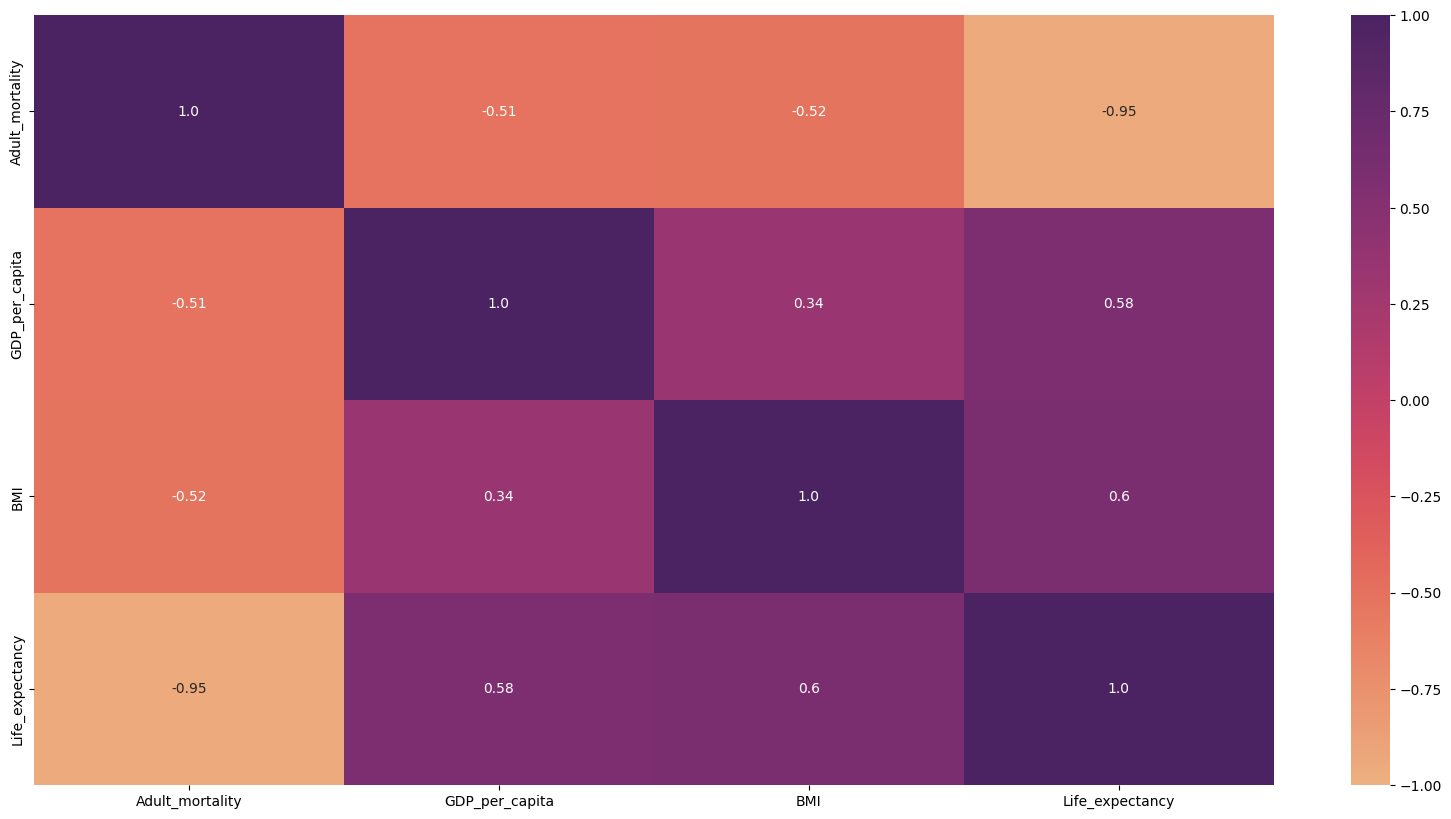

In [7]:
# Plotting correlation matrix between features onto a heatmap

plt.figure(figsize=(20,10))

sns.heatmap(data=df_main.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='flare',
           annot=True,
           fmt='.2')
plt.show()

After exploring correlations between the selected features further, we decided to remove Population (R^2 value of 0.026).

In [8]:
# Removing Life expectancy from features list

feature_cols = list(df_main.columns)
feature_cols.remove('Life_expectancy')

In [9]:
# Creating X and y

X = df_main[feature_cols]
y = df_main['Life_expectancy']

---

### 2. **Train-Test Split** 🔀
We split the dataset into training and test sets, ensuring a fair evaluation of the models' performance.

In [10]:
# Train-test splitting: 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

---

### 3. **Feature Engineering** ⚙️
We transformed and created new features to help the model learn more effectively.


In [11]:
# Feature engineering function

def feature_eng(df):
    df = sm.add_constant(df) #adding constant
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'cut', dtype=int) #one hot encoding region
    df_scale = df_main[['GDP_per_capita','Adult_mortality','BMI']] # list of features to scale features using Robust Scaler
    rob = RobustScaler() # Initial scaler
    rob.fit(df_scale) # Fitting the data

    ## Transform the data according to the scaler
    ## Save it as a new dataframe called df_scale_rob
    df_scale_rob = rob.transform(df_scale)
    df_main[['GDP_per_capita','Adult_mortality','BMI']] = df_scale_rob

    return df

In [12]:
# Applying feature engineering

X_train_fe = feature_eng(X_train)

In [13]:
# Ensuring y train index is the same as the featured engineered X train

y_train_fe = y_train.loc[X_train_fe.index]

In [14]:
# Verifying the contents and structure of the X_train_fe dataset

X_train_fe.head()

,const,Adult_mortality,GDP_per_capita,BMI,cut_Asia,cut_Central America and Caribbean,cut_European Union,cut_Middle East,cut_North America,cut_Oceania,cut_Rest of Europe,cut_South America
125,1.0,227.2180,2565,25.4,0,0,0,0,0,1,0,0
648,1.0,181.1225,2981,22.7,1,0,0,0,0,0,0,0
2729,1.0,127.4130,16277,26.5,0,1,0,0,0,0,0,0
1406,1.0,548.4965,996,24.7,0,0,0,0,0,0,0,0
1634,1.0,137.4770,2037,21.8,1,0,0,0,0,0,0,0


---

### 4. **OLS Regression** 🧮
We ran an OLS regression to get an initial understanding of the relationships between features and life expectancy.

In [15]:
# Fitting the model using linear regression and showing metrics

feature_cols_main = list(X_train_fe.columns)

lin_reg = sm.OLS(y_train_fe, X_train_fe[feature_cols_main])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3313.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:46:19   Log-Likelihood:                -5120.7
No. Observations:                2291   AIC:                         1.027e+04
Df Residuals:                    2279   BIC:                         1.033e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                63.2499      0.805     78.597      0.000      61.672      64.828
Adult_mortality                      -0.0591      0.001    -89.914      0.000      -0.060      -0.058
GDP_per_capita                      6.29e-05   3.62e-06     17.393      0.000    5.58e-05       7e-05
BMI                                   0.5710      0.031     18.316      0.000       0.510       0.632
cut_Asia                              2.6537      0.176     15.063      0.000       2.308       2.999
cut_Central America and Caribbean     3.2730      0.205     15.931      0.000       2.870       3.676
cut_European Union                    4.0224      0.210     19.180      0.000       3.611       4.434
cut_Middle East                       0.9302      0.242      3.837      0.000       0.455       1.406
cut_North America                     2.6987      0.430      6.276      0.000       1.855       3.542
cut_Oceania                          -0.2330      0.248     -0.938      0.348      -0.720       0.254
cut_Rest of Europe                    3.4931      0.223     15.671      0.000       3.056       3.930
cut_South America                     3.4171      0.236     14.461      0.000       2.954       3.880
==============================================================================
Omnibus:                       23.023   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.486
Skew:                          -0.109   Prob(JB):                     8.83e-08
Kurtosis:                       3.541   Cond. No.                     3.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions we can draw from the metrics:

* high R^2 value of 0.94
* AIC + BIC increased from complex model - to be expected
* Large condition number - due to reduction of features and some multicollinearity between features
* Kurtosis around 3, which is decent.
* P-values all under 0.05 (all statistically significant) except for Oceania: could be due to outliers in GDP of Oceania datapoints?

---

### 5. **Linear Regression Model** 🔑
Using linear regression, we trained our detailed model.

Training Set:

In [16]:
# Predicting life expectancy using linear regression model

y_pred = results.predict(X_train_fe[feature_cols_main])

In [17]:
# Showing rmse for training set

rmse_train = statsmodels.tools.eval_measures.rmse(y_train_fe, y_pred)

In [18]:
print(rmse_train)

2.261849696422629


Testing set:

In [19]:
# Applying feature engineering to testing set

X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols_main]

# Ensuring y test indices are the same as X test

y_test_fe = y_test.loc[X_test_fe.index]

In [20]:
# Ensuring y test indices are the same as X test

y_test_fe = y_test.loc[X_test_fe.index]

In [21]:
# Predicting life expectancy using lin reg model

y_test_pred = results.predict(X_test_fe)

In [22]:
# Showing rmse for testing dataset

rmse_test = statsmodels.tools.eval_measures.rmse(y_test_fe, y_test_pred)

In [23]:
print(rmse_test)

2.379300230698322


*  RMSE is much higher than the original model, this is to be expected due to the exclusion of features.
* No large overfitting or underfitting issues between training and testing datasets.

---

## Key Insights 💡
- The model achieves an RMSE of around 2.3, which is close to baseline despite exclusion of features.


---